In [1]:
import pandas as pd
s = pd.Series([990404,3448797,1515213,9896523]
             , index=["서울","부산","인천","대구"])
s

서울     990404
부산    3448797
인천    1515213
대구    9896523
dtype: int64

In [4]:
s.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [5]:
s.values

array([ 990404, 3448797, 1515213, 9896523], dtype=int64)

In [7]:
s.name = "인구"
s

서울     990404
부산    3448797
인천    1515213
대구    9896523
Name: 인구, dtype: int64

In [9]:
s.index.name = "도시"
s

도시
서울     990404
부산    3448797
인천    1515213
대구    9896523
Name: 인구, dtype: int64

In [10]:
s/10000

도시
서울     99.0404
부산    344.8797
인천    151.5213
대구    989.6523
Name: 인구, dtype: float64

In [12]:
s[1],s["부산"]

(3448797, 3448797)

In [13]:
s[(250e4 < s)]

도시
부산    3448797
대구    9896523
Name: 인구, dtype: int64

In [14]:
s[(250e4 < s) & (s < 500e4)]

도시
부산    3448797
Name: 인구, dtype: int64

In [18]:
s0 = pd.Series(range(3), index=["a","b","c"])
s0

a    0
b    1
c    2
dtype: int64

In [20]:
s0["a"]

0

In [22]:
for k, v in s.items():
    print(k,v)

서울 990404
부산 3448797
인천 1515213
대구 9896523


In [24]:
s2 = pd.Series({
    "서울": 9631482
    ,"부산": 3393191
    ,"인천": 2632035
    ,"대전": 1490158
})
s2

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [31]:
s

도시
서울     990404
부산    3448797
인천    1515213
대구    9896523
Name: 인구, dtype: int64

In [32]:
s2

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [3]:
import pandas as pd
data = pd.read_csv('C:\SeSAC\python-study\data\gapminder.tsv',sep='\t')

In [4]:
data

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [18]:
multi_group_year = \
    data.groupby('year')
multi_group_country = data.groupby('country')
multi_group_country.get_group('Afghanistan') # 원하는 부분 확인 가능
multi_group_country.size() # 각 그룹의 사이즈 화인

country
Afghanistan           12
Albania               12
Algeria               12
Angola                12
Argentina             12
                      ..
Vietnam               12
West Bank and Gaza    12
Yemen, Rep.           12
Zambia                12
Zimbabwe              12
Length: 142, dtype: int64

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)

In [40]:
name_df = []
for i in range(2000,2010):
    df = pd.read_csv('data/names/yob'+str(i)+'.txt',header = None)
    df['year'] = i
    name_df.append(df)
names = pd.concat(name_df)
names.columns = ['Name','Sex','Count','Year']
names['Sex'].value_counts()/names['Sex'].count()

F    0.58857
M    0.41143
Name: Sex, dtype: float64

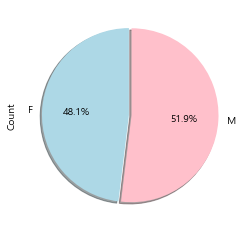

In [36]:
names.groupby('Sex').sum().Count.plot.pie(explode=[0,0.03],colors=['lightblue','pink'],startangle=90,shadow=True,autopct='%1.1f%%')

Text(0, 0.5, 'count')

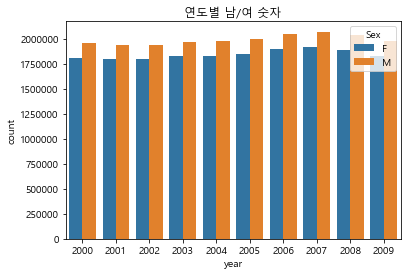

In [37]:
import seaborn as sns

ax = plt.subplots()
ax = sns.barplot('Year','Count',data=names.groupby(['Year','Sex']).sum().reset_index(level=0).reset_index(level=0),hue='Sex')
ax.set_title('연도별 남/여 숫자')
ax.set_xlabel('year')
ax.set_ylabel('count')

In [ ]:
그래프 그리기